
## Model Summary
It took 10 minutes to load data
3 minutes to run CNN model
1. Dataset:
(736, 128, 128, 3)
2. Model
- Initial model
batch_size=28, epochs=30, validation_split = 0.2

 *need to update validation split*
- Initial model performance:
loss: 1.3892 - accuracy: 0.5483 - val_loss: 1.2721 - val_accuracy: 0.4045

- VGG performance


3. Threshold optimization
- Gmeans
Best Threshold=0.564815, G-Mean=0.271

## Import Packages

In [ ]:
#import rasterio
import numpy as np
import subprocess 
from subprocess import PIPE
#import rasterio
import json
import glob 
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data 

In [ ]:
from IPython.core.display import Image
def data_status(path,date_list):
    data = [] 
    images = list([])
    labels = []

    folderlist = []
    countlist = []
    nonflood = 0
    flood = 0
    label = [0]
    for folder in os.listdir(path):
      #non-flood
      if folder[-8:] in date_list:
        label = [0]
        folderlist.append(folder[-8:])
        print(folder[-8:])
        for i in os.listdir(path + folder + "/"):
          if i == 'files':
            count = 0
            #for i, image in (os.listdir(path + folder + "/" + i + "/" )):
            for count, image in enumerate(os.listdir(path + folder + "/" + i + "/" )):
              if count == 20:
                break
              else:
                if image[-36:] == '3B_AnalyticMS_SR_harmonized_clip.tif' or image[-18:] == '3B_Visual_clip.tif':
                  count += 1
                  nonflood += 1
                  imarray = cv2.imread(path + folder + "/" + i + "/" + image)
                  try:
                    cur_image = cv2.resize(imarray,dsize=(128,128),interpolation = cv2.INTER_CUBIC)
                  except Exception:
                      continue
                  images.append(cur_image)
                  labels.append(label)
              countlist.append(count)
            #print(count)
        #flood
        else:
          label = [1]
          folderlist.append(folder[-8:])
          print(folder[-8:])
          for i in os.listdir(path + folder + "/"):
            if i == 'files':
              count = 0
              for count, image in enumerate(os.listdir(path + folder + "/" + i + "/" )):
              #for image in os.listdir(path + folder + "/" + i + "/" ):
                if count == 20:
                  break
                else:            
                  if image[-36:] == '3B_AnalyticMS_SR_harmonized_clip.tif' or image[-18:] == '3B_Visual_clip.tif':
                    count += 1
                    #nonflood += 1
                    flood += 1
                    imarray = cv2.imread(path + folder + "/" + i + "/" + image)
                    try:
                      cur_image = cv2.resize(imarray,dsize=(128,128),interpolation = cv2.INTER_CUBIC)
                    except Exception:
                      continue
                    images.append(cur_image)
                    labels.append(label)
                countlist.append(count)
            #print(count)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
    data.append([images, labels])     
    #images = np.array(images)   
    #images = list(images)
    #print(labels)
    #return nonflood, flood
    return images, labels
    #return nonflood, folderlist, countlist, images, labels

In [ ]:
newpath = '/content/drive/MyDrive/KPMG Practicum/PlanetData/dataset/'
date_list = ['20180816',
'20180319',
'20200622',
'20200219',
'20200206',
'20201011',
'20201211',
'20200828',
'20211230',
'20210604']
#label_date_list: ['20171105','20191013','20191001','20171007']
#10 non flood date

In [ ]:
train_images, train_labels = data_status(newpath, date_list)

FileNotFoundError: ignored

In [ ]:
train_images.shape

NameError: ignored

(736, 128, 128, 3)

In [ ]:
train_labels.shape

(80, 1)

## Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, random_state=0)

X_train.shape, y_train.shape


((60, 128, 128, 3), (60, 1))

## Model

In [ ]:
# Import the Deep Learing modules
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
#import pydot

# from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
import cv2
import os
import numpy as np

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128,128, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


### Compile the Model

In [ ]:
#model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
#binary_crossentropy
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

### Fit the model on the training data

In [ ]:
#history = model.fit(train_images, train_labels, batch_size=28, epochs=2, validation_split = 0.2)
history = model1.fit(X_train, y_train, batch_size=28, epochs=30)

Epoch 1/30
3/3 [==============================] - 3s 322ms/step - loss: 214.6152 - accuracy: 0.5333
Epoch 2/30
3/3 [==============================] - 1s 310ms/step - loss: 102.7378 - accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 1s 332ms/step - loss: 117.3699 - accuracy: 0.5667
Epoch 4/30
3/3 [==============================] - 1s 325ms/step - loss: 80.1139 - accuracy: 0.5667
Epoch 5/30
3/3 [==============================] - 1s 317ms/step - loss: 51.0092 - accuracy: 0.5667
Epoch 6/30
3/3 [==============================] - 2s 481ms/step - loss: 24.7017 - accuracy: 0.5667
Epoch 7/30
3/3 [==============================] - 2s 542ms/step - loss: 11.4050 - accuracy: 0.5667
Epoch 8/30
3/3 [==============================] - 3s 748ms/step - loss: 3.5020 - accuracy: 0.5833
Epoch 9/30
3/3 [==============================] - 3s 656ms/step - loss: 1.4333 - accuracy: 0.5833
Epoch 10/30
3/3 [==============================] - 3s 780ms/step - loss: 0.9222 - accuracy: 0.6333
Epoch 11/

##### plot

Epoch 1/30
3/3 [==============================] - 2s 508ms/step - loss: 0.6436 - accuracy: 0.6167
Epoch 2/30
3/3 [==============================] - 2s 379ms/step - loss: 0.6629 - accuracy: 0.6167
Epoch 3/30
3/3 [==============================] - 1s 312ms/step - loss: 0.6805 - accuracy: 0.6167
Epoch 4/30
3/3 [==============================] - 1s 319ms/step - loss: 0.6608 - accuracy: 0.6167
Epoch 5/30
3/3 [==============================] - 1s 315ms/step - loss: 0.6362 - accuracy: 0.6167
Epoch 6/30
3/3 [==============================] - 1s 308ms/step - loss: 0.6252 - accuracy: 0.6167
Epoch 7/30
3/3 [==============================] - 1s 312ms/step - loss: 0.6160 - accuracy: 0.6167
Epoch 8/30
3/3 [==============================] - 1s 316ms/step - loss: 0.6177 - accuracy: 0.6167
Epoch 9/30
3/3 [==============================] - 1s 315ms/step - loss: 0.6210 - accuracy: 0.6167
Epoch 10/30
3/3 [==============================] - 1s 316ms/step - loss: 0.6236 - accuracy: 0.6167
Epoch 11/30
3/3 [==

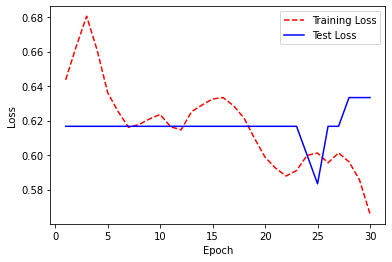

In [ ]:
#history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=28, epochs=30, verbose=1)
#history2 = model2.fit(train_features, y_train, batch_size=28, epochs=30)
history = model1.fit(X_train, y_train, batch_size=28, epochs=30)
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=False)
model1.evaluate(X_train, y_train, verbose=False)

[0.5558328032493591, 0.6333333253860474]

In [ ]:
# Save the trained model
model1.save("my_model1")
# model = keras.models.load_model('path/to/location')

INFO:tensorflow:Assets written to: my_model1/assets


### Feature extraction with VGG ImageNet

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
train_features = model.predict(X_train)

test_features = model.predict(X_test)

In [ ]:
# Save the features calculated earlier
np.save("train_features.npy", train_features)
np.save("test_features", test_features)

# Load the trained weights
# loaded_array = np.load("train_features.npy")
# loaded_array = np.load("test_features.npy")

In [ ]:
type(train_features)

numpy.ndarray

In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [ ]:
n_train, x, y, z
n_test, x, y, z
train_features.shape
#test_features.shape
#train_labels.shape


(60, 4, 4, 512)

### Train on top of VGG

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

#model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#history2 = model2.fit(train_features, train_labels, batch_size=28, epochs=30)

In [ ]:
history2 = model2.fit(train_features, y_train, batch_size=28, epochs=30)

#### plot


In [ ]:
history2.history.keys()

dict_keys(['loss', 'accuracy'])

Epoch 1/30
3/3 [==============================] - 0s 9ms/step - loss: 0.8624 - accuracy: 0.6333
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 0.7049 - accuracy: 0.6500
Epoch 3/30
3/3 [==============================] - 0s 12ms/step - loss: 0.7592 - accuracy: 0.6500
Epoch 4/30
3/3 [==============================] - 0s 10ms/step - loss: 0.8203 - accuracy: 0.6500
Epoch 5/30
3/3 [==============================] - 0s 9ms/step - loss: 0.8190 - accuracy: 0.6500
Epoch 6/30
3/3 [==============================] - 0s 10ms/step - loss: 0.7415 - accuracy: 0.6500
Epoch 7/30
3/3 [==============================] - 0s 10ms/step - loss: 0.6900 - accuracy: 0.6833
Epoch 8/30
3/3 [==============================] - 0s 11ms/step - loss: 0.7812 - accuracy: 0.6333
Epoch 9/30
3/3 [==============================] - 0s 12ms/step - loss: 0.7319 - accuracy: 0.6500
Epoch 10/30
3/3 [==============================] - 0s 9ms/step - loss: 0.6837 - accuracy: 0.6333
Epoch 11/30
3/3 [===============

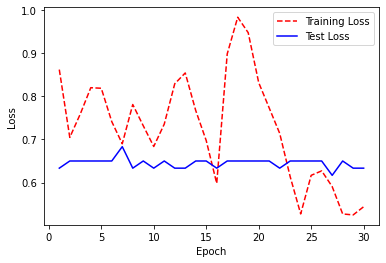

In [ ]:
#history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=28, epochs=30, verbose=1)
history2 = model2.fit(train_features, y_train, batch_size=28, epochs=30)
# Get training and test loss histories
training_loss = history2.history['loss']
test_loss = history2.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

## Evaluating the result

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

KeyError: ignored

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = model1.evaluate(X_test, y_test, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model1.save("model.h5")
#plot_model_history(history)

2/2 [==============================] - 0s 60ms/step - loss: 0.6932 - accuracy: 0.5000
Validation: accuracy = 0.500000  ;  loss_v = 0.693225


In [ ]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 28800)             0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:
model.summary()
#VGG16

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 8192)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               1048704   
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,048,833
Trainable params: 1,048,833
Non-trainable params: 0
_________________________________________________________________


## performance metrics
* Stratified K-Fold Cross-validation - due to unbalance class
* Confusion Matrix
* ROC AUC Curve
* F-1 Score
* Brier Score 

### Stratified K-Fold Cross-validation - due to unbalance class

In [ ]:
# 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset

X = X_train
Y = y_train
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128,128, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
	])
	# Compile model
	model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model1.fit(X_train, y_train, epochs=30, batch_size=28, verbose=0)
	# evaluate the model
	scores = model1.evaluate(X_test, y_test, verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

### Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
pred = model1.predict(X_test)
labels = (pred > 0.353975).astype(np.int)
#y_probs = pred[:,1]
conf = confusion_matrix(y_test, labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, labels).ravel()
tn, fp, fn, tp

(1, 12, 6, 1)

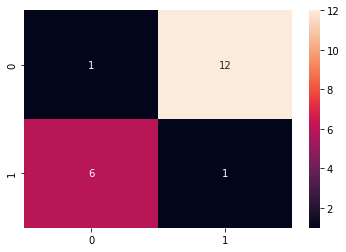

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model1.predict(X_test)
labels_p2 = (pred > 0.6199619770050049).astype(np.int)
recall_p2 = sklearn.metrics.recall_score(y_test, labels_p2, pos_label=1)
recall_p2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

In [ ]:
import sklearn.metrics
labels = (pred > 0.5).astype(np.int)
labels_p = (pred > 0.353975).astype(np.int)

acc = sklearn.metrics.accuracy_score(y_test, labels)
#print(acc)
precision = sklearn.metrics.precision_score(y_test, labels, pos_label=1)
#print(precision)
recall = sklearn.metrics.recall_score(y_test, labels, pos_label=1)
#print(recall)
labels_p = (pred > 0.353975).astype(np.int)
acc_p = sklearn.metrics.accuracy_score(y_test, labels_p)
precision_p = sklearn.metrics.precision_score(y_test, labels_p, pos_label=1)
recall_p = sklearn.metrics.recall_score(y_test, labels_p, pos_label=1)
metricdf = pd.DataFrame({'acc':[acc, acc_p], 'precision':[precision, precision_p], 'recall':[recall, recall_p]})
metricdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

,acc,precision,recall
0,0.05,0.000000,0.000000
1,0.10,0.076923,0.142857


### ROC AUC Curve


In [ ]:
#model1
#pred_prob1 = model1.predict_proba(X_test)
predict_prob=model1.predict(X_test)
predict_classes=np.argmax(predict_prob,axis=1)
# auc scores
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, predict_classes)
print(auc_score1)

0.5


In [ ]:
#model2
predict_prob2=model2.predict(test_features)
predict_classes2=np.argmax(predict_prob2,axis=1)
# auc scores
from sklearn.metrics import roc_auc_score
auc_score2 = roc_auc_score(y_test, predict_classes2)
print(auc_score2)

0.5


0.5


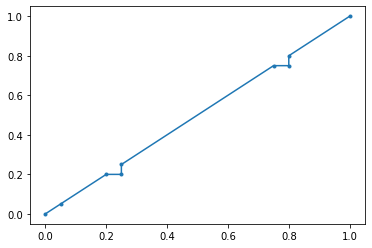

In [ ]:
from sklearn.metrics import roc_curve, auc

#history

y_pred = model1.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

### F-1 Score
Brier Score

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

## Threshold - Gmeans

In [ ]:
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [ ]:
X_test.shape

(20, 128, 128, 3)

In [ ]:
#X_train, X_test, y_train, y_test
y_probs = model1.predict(X_test)
y_probs.shape

(20, 1)

In [ ]:
# predict probabilities
y_probs = model1.predict(X_test)
# keep probabilities for the positive outcome only
#y_probs = y_probs[:,1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
y_probs.shape

(20, 1)

In [ ]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.380780, G-Mean=0.105


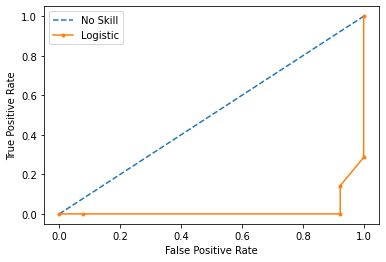

In [ ]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### Precision-Recall


In [ ]:
# Create the Precision-Recall curve
y_probs = model1.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the ROC curve
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})
df_recall_precision.head(8)


,Precision,Recall,Threshold
0,0.350000,1.000000,0.000218
1,0.315789,0.857143,0.069396
2,0.277778,0.714286,0.123766
3,0.235294,0.571429,0.194784
4,0.187500,0.428571,0.311052
5,0.133333,0.285714,0.317065
6,0.076923,0.142857,0.380780
7,0.000000,0.000000,0.518901


In [ ]:
df_recall_precision['Precision'][7]

0.0

In [ ]:
# Calculate the f-score
fscore = (2 * precision * recall) / (precision + recall)
# Find the optimal threshold
index = np.argmax(fscore)
index
#thresholdOpt = round(thresholds[index], ndigits = 6)
#print('Best Threshold: {} '.format(thresholdOpt))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


7

In [ ]:
# Calculate the f-score
fscore = (2 * precision * recall) / (precision + recall)

# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 6)
fscoreOpt = round(fscore[index], ndigits = 6)
recallOpt = round(recall[index], ndigits = 6)
precisionOpt = round(precision[index], ndigits = 6)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))


Best Threshold: 0.6199619770050049 with F-Score: nan
Recall: 0.0, Precision: 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
